# Test ForagerEnv

In [1]:
import sys
sys.path.append('../src')

In [2]:
from environments.foragers import ForagersEnv

In [4]:
env = ForagersEnv(
    initial_rate=0.5,
    initial_wealth=0.5
)
state = env.reset()
print(state)

((0.5, 0.5), {})


In [ ]:
from utils.interaction import Episode
from utils.interpreters import gym_interpreter1
from 

Create Tile-coding state-value function approximator

In [7]:
state_scales = [
    {'min':0, 'max':1},
    {'min':0, 'max':1},
]
tiles_parameters = {
    'numDims': 2,
    'numTilings': 8,
    'numTiles': [8, 8],
    'scaleFactors':state_scales,
    'maxSize':4096,
    'alpha':0.1
}
value_approximator = TilesQ(parameters=tiles_parameters)

Create Q-agent

In [ ]:
agent_parameters = {
    'nA':3,
    'nS':2,
    'gamma':1,
    'epsilon':0,
    'alpha':0.1,
    'Q':value_approximator
}

In [ ]:
agent_parameters = {
    'nA':4,
    'nS':16,
    'gamma':1,
    'epsilon':0.1,
    'alpha':0.1
}
env_parameters = {'desc':["SFFF", "FFHF", "FHFF", "FFFG"],
                  'is_slippery':True}
perf = Performer(env_name='FrozenLake-v1',
                 env_parameters=env_parameters,
                 state_interpreter=gym_interpreter1,
                 agent_name='Q_learning',
                 agent_parameters=agent_parameters)

Para verificar que el agente y el entorno están interactuando correctamente, podemos usar el método `run()`, el cual mostrará al agente actuando sobre el entorno. Dado que el render del entorno ABC es muy poco informativo, pues solo muestra el estado en el que está el agente, vamos a correr en modo para cazar errores usando el parámetro `visual=False`. Usualmente corremos este método sin argumentos, pues por defecto el valor es `True`:

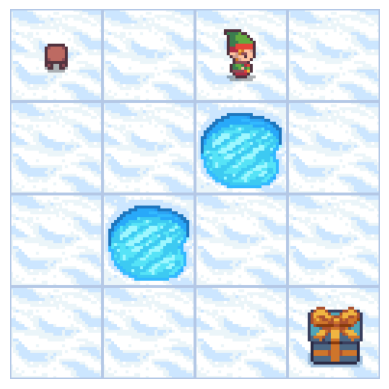

Number of rounds: 12
Total reward: 0.0


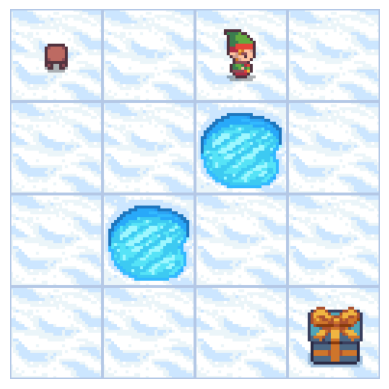

In [4]:
perf.run(from_file=False, to_video=False)

In [6]:
perf.environment.metadata

{'render_modes': ['human', 'ansi', 'rgb_array'], 'render_fps': 4}

Corremos el método de entrenamiento, `train()`, para decirle al agente que aprenda a resolver el entorno. Observe que se obtiene un dataset con el progreso del agente y una gráfica de la recompensa total por episodio. Si el agente está aprendiendo, la recompensa debería aumentar progresivamente. El agente (política y valores Q) se guarda en un archivo json al final del entrenamiento.

  0%|          | 0/1000 [00:00<?, ?it/s]

Data saved to /Users/edgar/Library/CloudStorage/OneDrive-Universidaddelrosario/Materias/Aprendizaje por refuerzo/CursoRL/clase-rl/Notebooks/data/Q_learning_in_FrozenLake-v1/Q_learning_in_FrozenLake-v1.csv
Agent saved to /Users/edgar/Library/CloudStorage/OneDrive-Universidaddelrosario/Materias/Aprendizaje por refuerzo/CursoRL/clase-rl/Notebooks/models/Q_learning_in_FrozenLake-v1/Q_learning_in_FrozenLake-v1.json
Plot saved to /Users/edgar/Library/CloudStorage/OneDrive-Universidaddelrosario/Materias/Aprendizaje por refuerzo/CursoRL/clase-rl/Notebooks/images/Q_learning_in_FrozenLake-v1/Q_learning_in_FrozenLake-v1.png


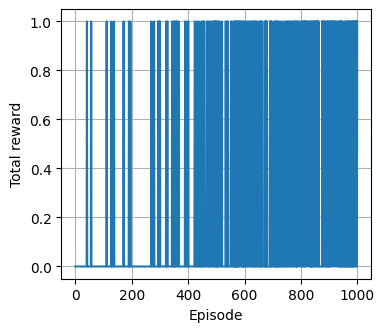

In [7]:
perf.train(
    num_rounds=1000,
    num_episodes=1000
)

Si queremos ver el desempeño del agente "en producción", es decir, sin que este pueda deambular explorando acciones aleatorias, podemos usar el método `test()`. Obtendremos el promedio de la recompensa total sobre 100 episodios y el correspondiente histograma:

Loading agent from /Users/edgar/Library/CloudStorage/OneDrive-Universidaddelrosario/Materias/Aprendizaje por refuerzo/CursoRL/clase-rl/Notebooks/models/Q_learning_in_FrozenLake-v1/Q_learning_in_FrozenLake-v1.json


  0%|          | 0/100 [00:00<?, ?it/s]

Data saved to /Users/edgar/Library/CloudStorage/OneDrive-Universidaddelrosario/Materias/Aprendizaje por refuerzo/CursoRL/clase-rl/Notebooks/data/Q_learning_in_FrozenLake-v1/Q_learning_in_FrozenLake-v1_test_csv.csv
Average sum of rewards:
 model
Q_learning    0.97
Name: reward, dtype: float64

Episode termination percentage:
 model
Q_learning    97.0
Name: done, dtype: float64
Plot saved to /Users/edgar/Library/CloudStorage/OneDrive-Universidaddelrosario/Materias/Aprendizaje por refuerzo/CursoRL/clase-rl/Notebooks/images/Q_learning_in_FrozenLake-v1/Q_learning_in_FrozenLake-v1_test.png


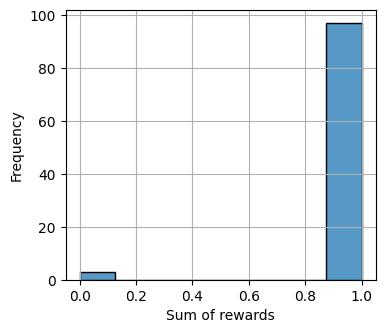

In [8]:
perf.test(num_episodes=100)

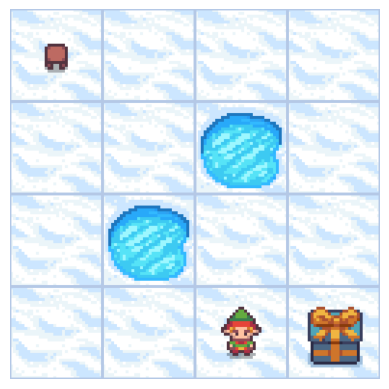

Number of rounds: 79
Total reward: 1.0


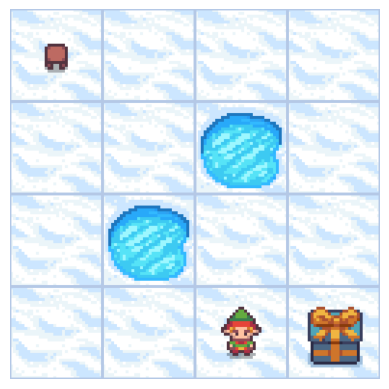

In [9]:
perf.run(from_file=True, to_video=False)